<a href="https://colab.research.google.com/github/Lavan1999/Project-7_IndustrialCopperModeling/blob/main/Industrial_copper_modeling_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from google.colab import drive

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score , classification_report,mean_absolute_error# Regression
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,confusion_matrix # Classification

In [ ]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f=open('/content/drive/My Drive/Project5-Copper/Copper_Set.xlsx - Result 1.csv')
df = pd.read_csv(f)

<ipython-input-3-9ac3a51c2754>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

# **Data Cleaning Process**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [ ]:
print(len(df['item_date'].unique()))
print(len(df['customer'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique()))
print(len(df['delivery date'].unique()))

253
1170
16564
33
29


# **Handling Null values**

In [ ]:
# Data type conversion and transformation:
# - Prepares data for analysis by ensuring consistent data types
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [ ]:
# Removing 'id' and 'material_ref' columns as they are not needed for analysis
df = df.drop(['id'], axis = 1)
df = df.drop(['material_ref'], axis = 1)

In [ ]:
# Fill missing values in 'item_date' and 'delivery date' columns with the previous non-null value
df['item_date'] = df['item_date'].fillna(method='ffill')
df['delivery date'] = df['delivery date'].fillna(method='ffill')

In [ ]:
# Data preprocessing:
# - Convert relevant columns to appropriate numeric data types
# - Impute missing numeric values with the mean across the dataset
# - Drop rows with missing categorical values in 'customer', 'country', and 'status' columns
# - Impute missing values in numeric columns with the mean across the dataset

df = df[df['quantity tons'] != 'e']
df['quantity tons'] = df['quantity tons'].astype(float)
df.fillna(value = df['quantity tons'].mean(), inplace= True)
df.dropna(subset=['customer'], inplace = True)
df.dropna(subset=['country'], inplace = True)
df.dropna(subset=['status'], inplace = True)
df.fillna(value = df['thickness'].mean(), inplace= True)

In [ ]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# **Exploratory Data Analysis (EDA)**

# quantity tons feature

In [ ]:
df['quantity tons'].unique()

array([   54.15113862,   768.0248392 ,   386.1279489 , ...,
           4.23559357, -2000.        ,   406.6865384 ])

In [ ]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

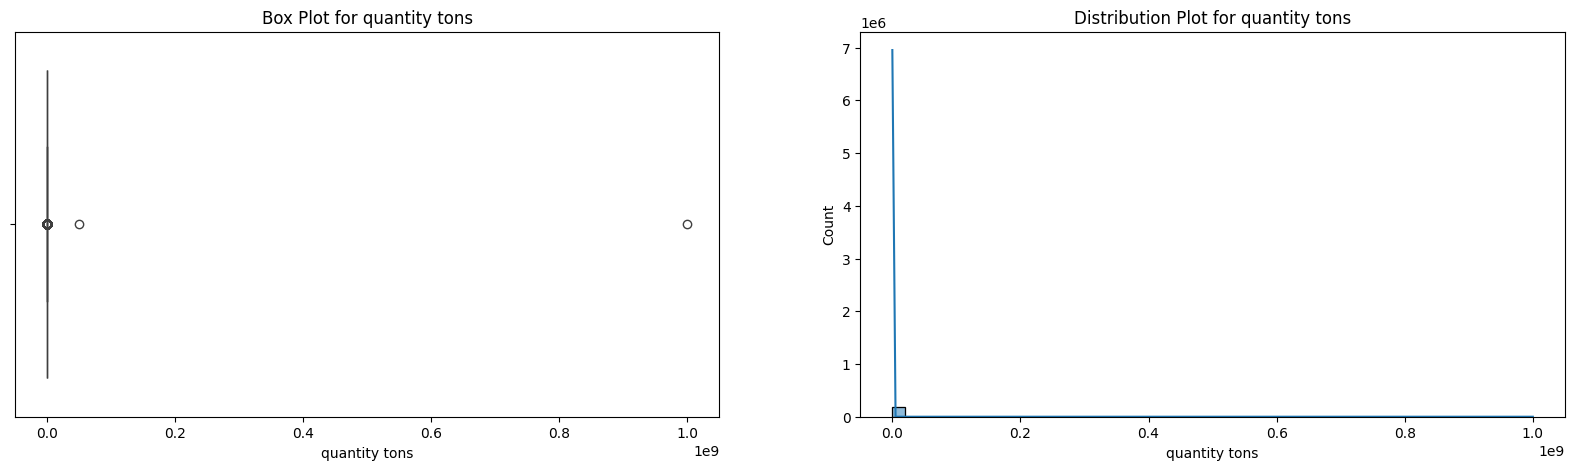

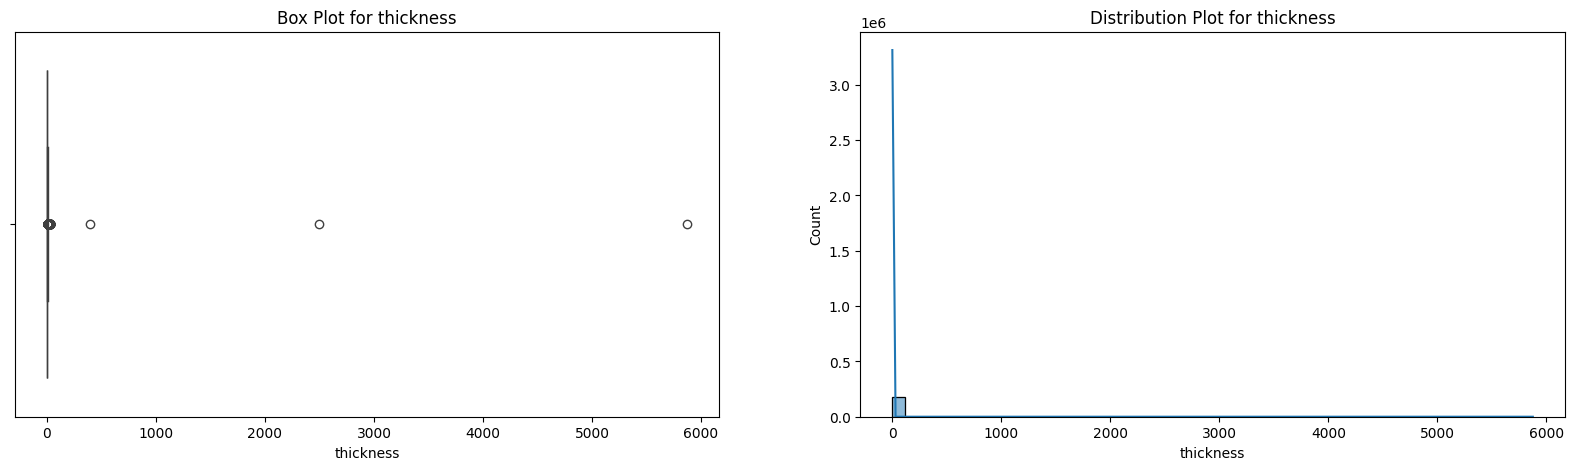

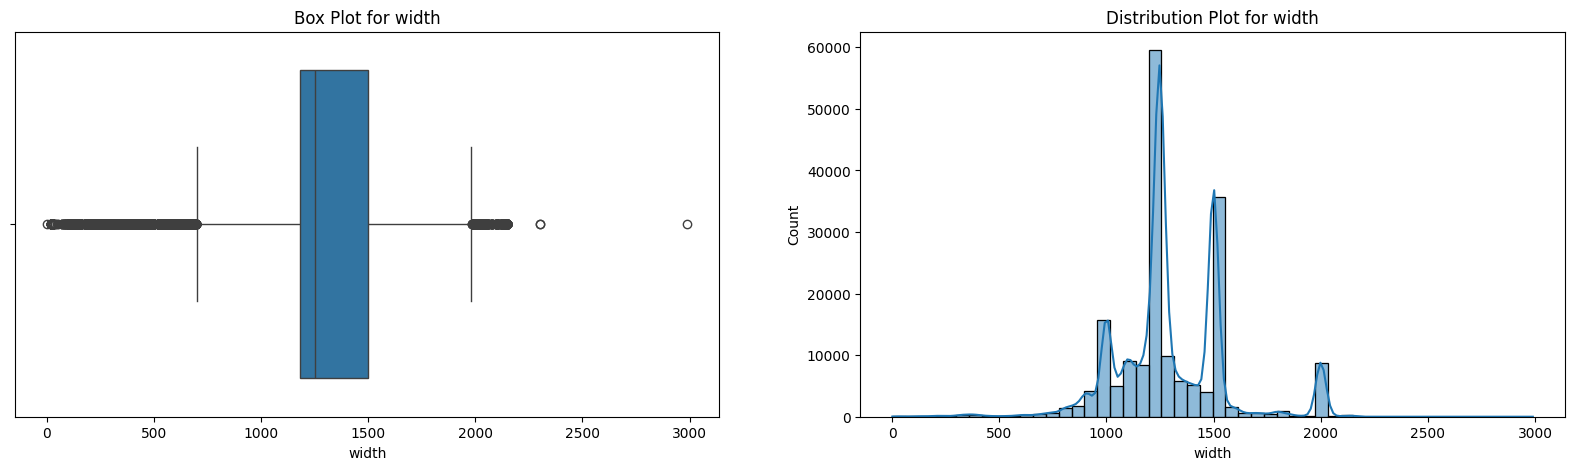

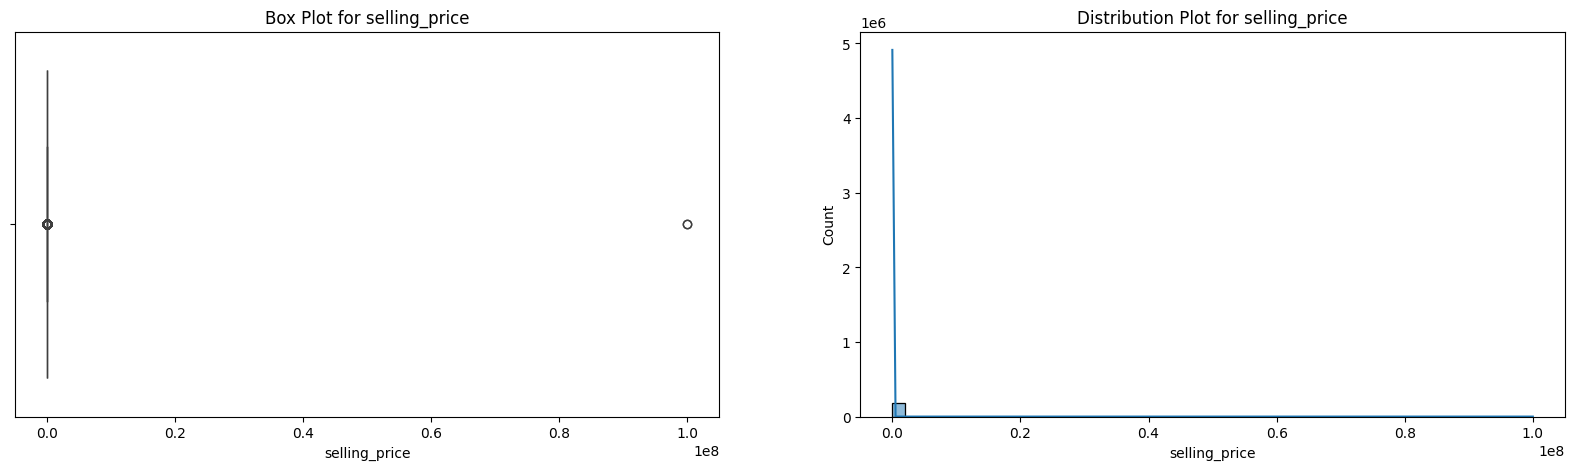

In [ ]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [ ]:
df1 = df.copy()
df1['quantity tons'] = np.log(df1['quantity tons'])
df1['thickness'] = np.log(df1['thickness'])
df1['selling_price'] = np.log(df1['selling_price'])
df1

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105
181671,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,164141591,2020-07-01,6.398595


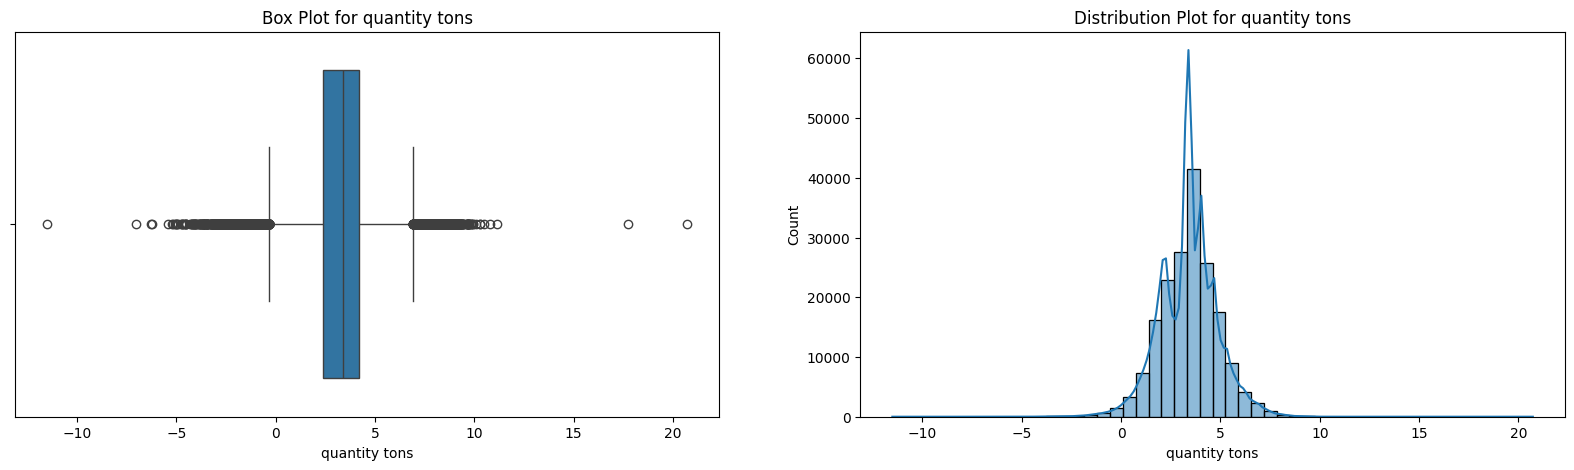

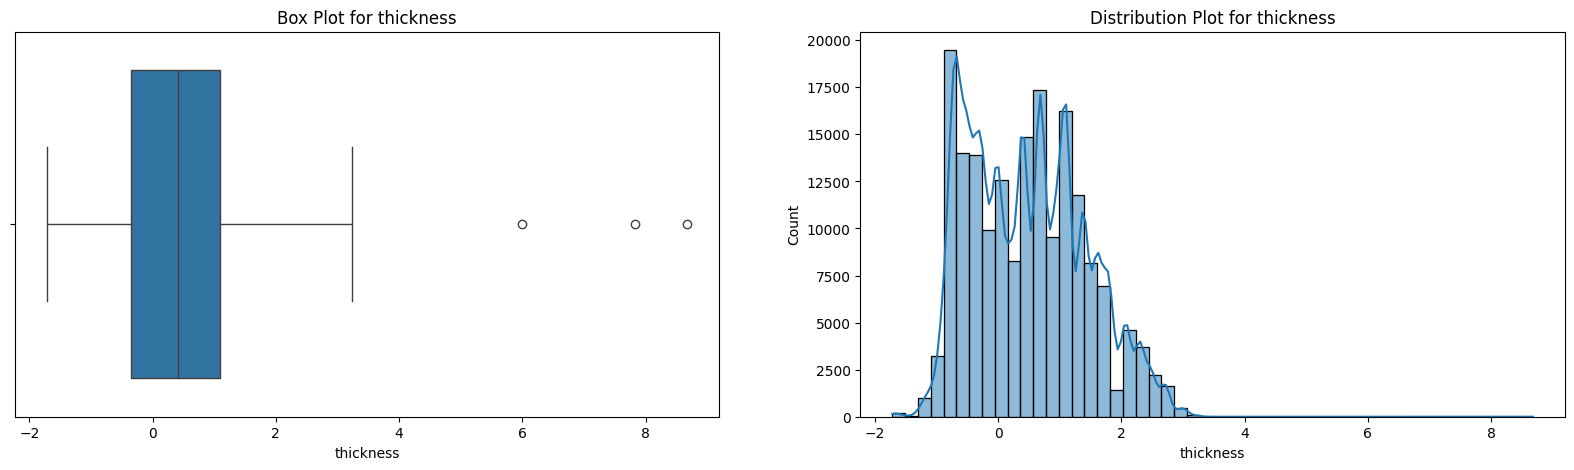

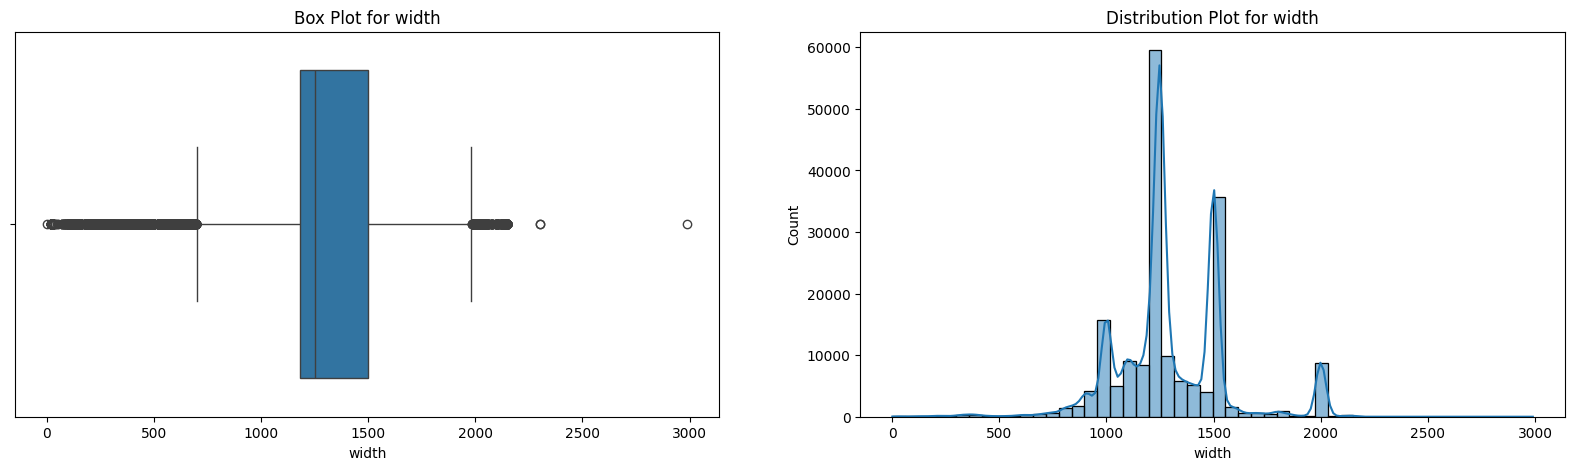

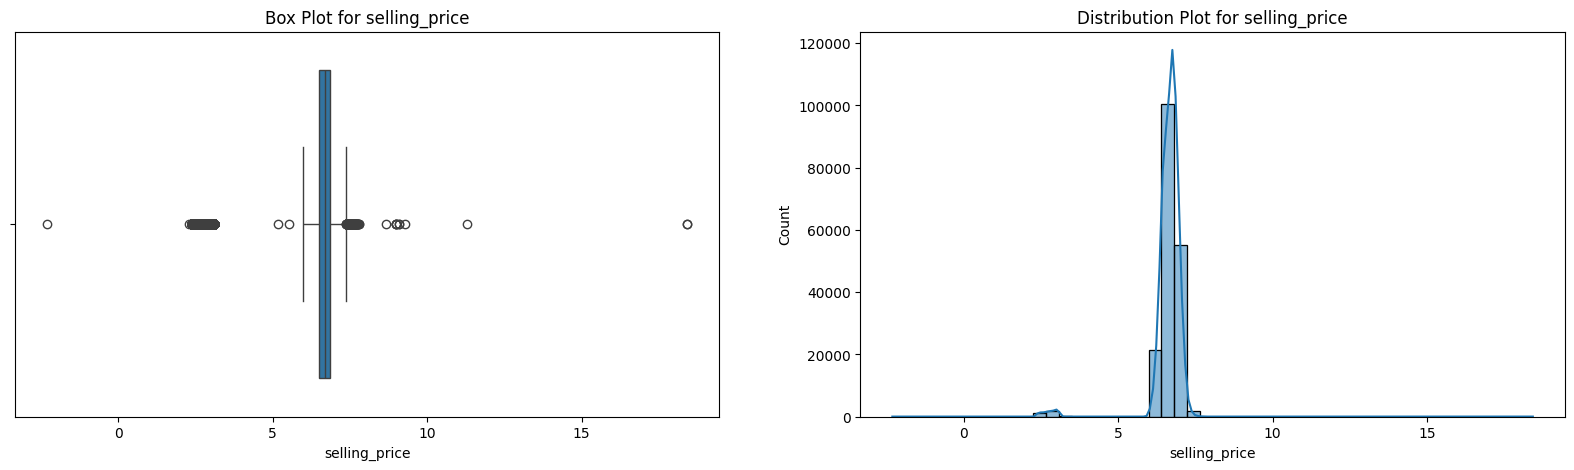

In [ ]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df1, 'quantity tons')
outlier(df1, 'thickness')
outlier(df1, 'selling_price')
outlier(df1, 'width')
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,1980.0,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,164141591,2020-07-01,6.428105
181671,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,164141591,2020-07-01,6.398595


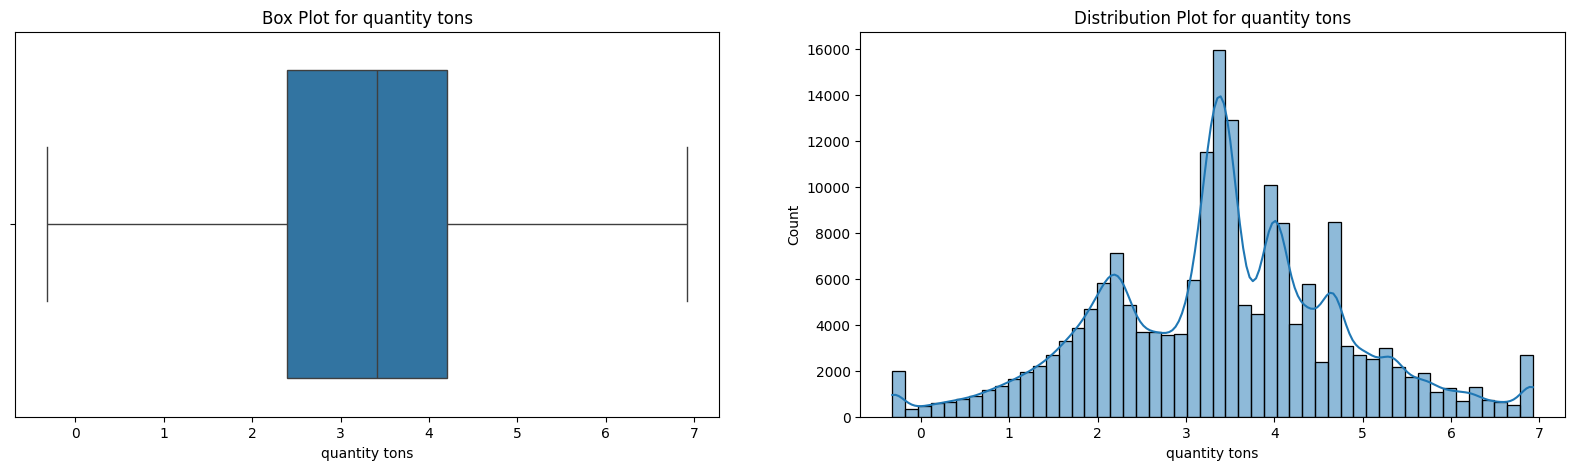

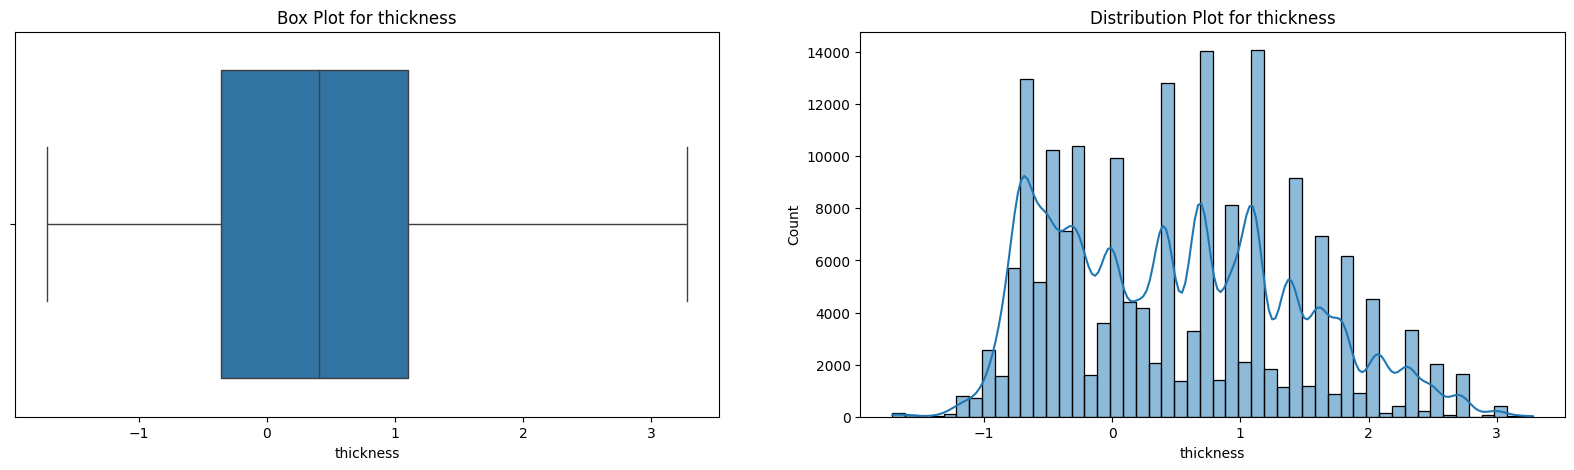

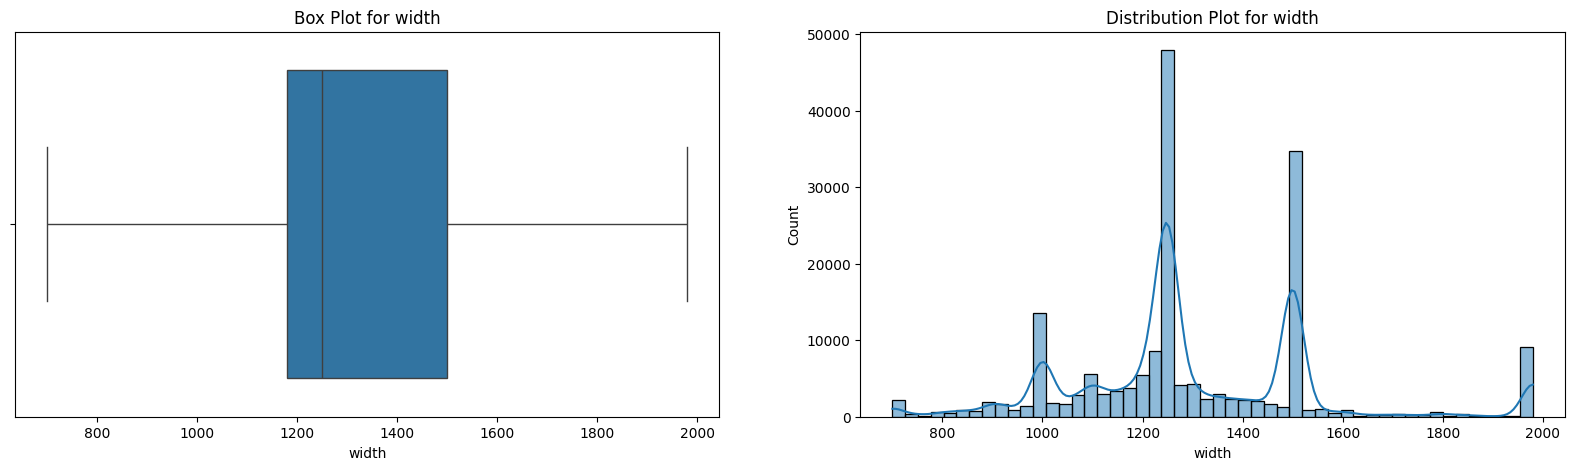

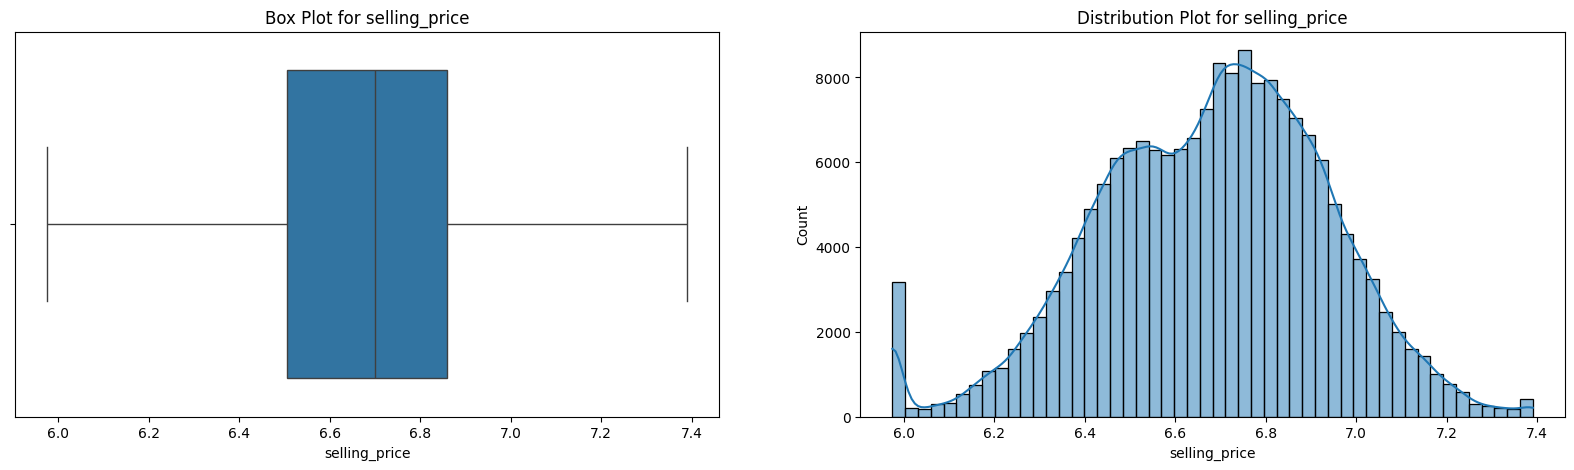

In [ ]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

preprocessing to ensure data integrity and reliability. Initial steps involved removing erroneous entries and converting the column to a suitable numeric data type. Extreme outliers were then identified and filtered out, followed by further outlier detection using the interquartile range (IQR) method. Outliers beyond a certain threshold were clipped, resulting in a refined dataset suitable for subsequent analysis.

# **Data Visualization**

<Axes: >

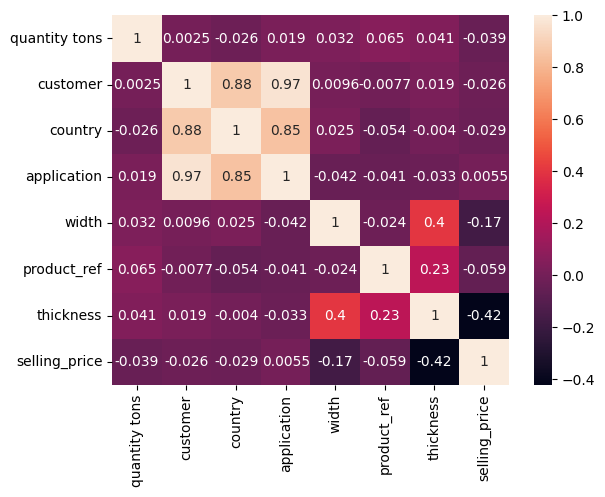

In [ ]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons','customer','country','application','width','product_ref','thickness','selling_price']
df_heatmap = df1[col].corr()
sns.heatmap(df_heatmap, annot=True)

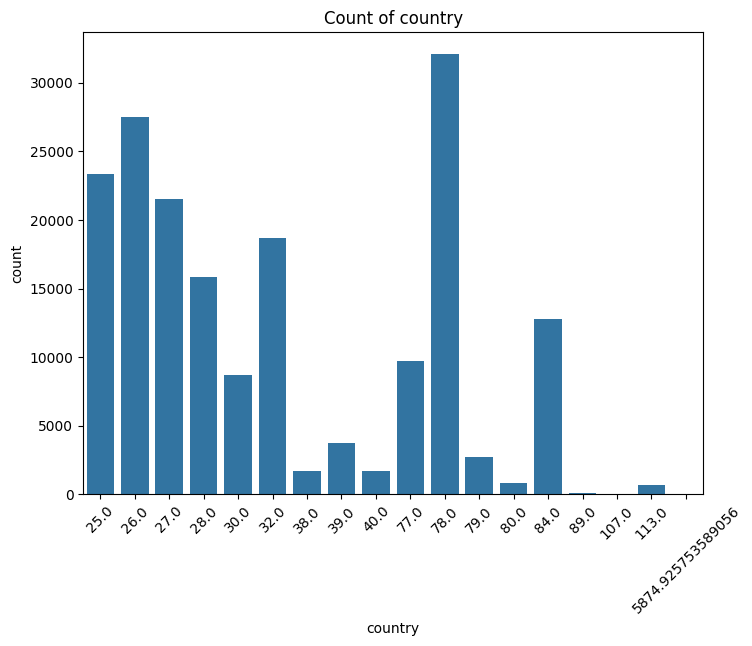

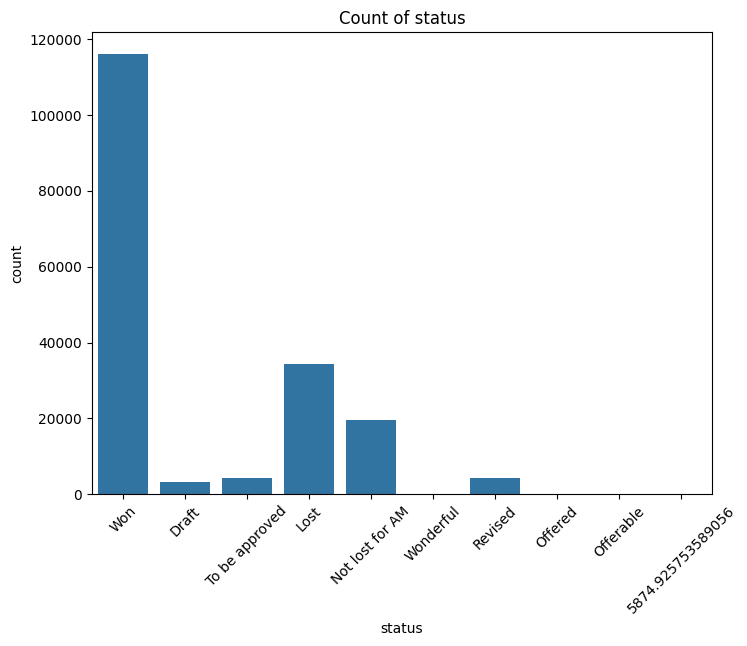

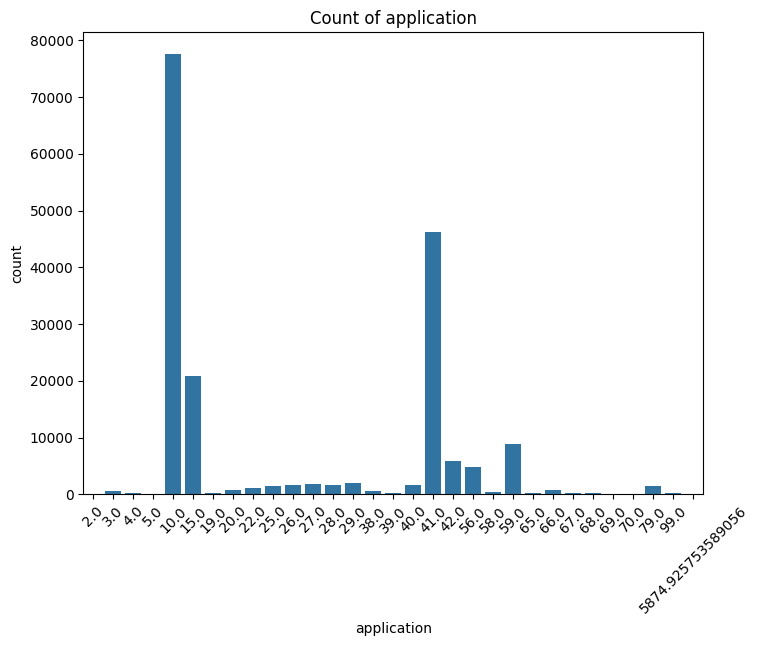

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cat_vars = ['country', 'status', 'application']
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)
    plt.show()

# **For Regression:**

# NLP-Natural Language Processing

In [ ]:
df1["status"] = df1["status"].replace({'Won': 1, 'Draft': 7, 'To be approved': 6, 'Lost': 0, 'Not lost for AM': 2, 'Wonderful': 8, 'Revised': 5, 'Offered': 4, 'Offerable': 3})
df1["item type"] = df1["item type"].replace({'W': 5, 'WI': 6, 'S': 3, 'Others': 1, 'PL': 2, 'IPL': 0, 'SLAWR': 4})

In [ ]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665,2021-03-01,6.357842


In [ ]:
df1.status.unique()

array([1.00000000e+00, 7.00000000e+00, 6.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 8.00000000e+00, 5.00000000e+00, 4.00000000e+00,
       3.00000000e+00, 5.87492575e+03])

In [ ]:
df1['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [ ]:
df1.status.isnull().sum()

0

In [ ]:
df1.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    5
dtype: int64

In [ ]:
df1.dropna(inplace = True)

In [ ]:
df1.to_csv('CopperRegression.csv',index = False)

In [ ]:
#f=open('/content/drive/My Drive/Project5-Copper/CopperModelingRegression.csv')
#dfr = pd.read_csv(f)

In [ ]:
df1['width'].min(),df1['width'].max()

(700.0, 1980.0)

# Model Building

In [ ]:
import pickle

In [ ]:
x1=df1.drop(["selling_price", 'item_date', 'delivery date'],axis=1)
y1=df1["selling_price"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics


In [ ]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}


decisiontree Regressor accuracy score:  0.9977049019571103 0.5104912499204237
RandomForestRegressor accuracy score:  0.9575175652657769 0.7105332744974076
GradientBoostingRegressor accuracy score:  0.5202512046677961 0.5179515142157493
AdaBoostRegressor accuracy score:  0.4272209359092912 0.42453646511391463
Extra Trees Regressor accuracy score:  0.9977049019571103 0.6521761337609064


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.8629129811239806, 0.7223478530274465)

In [ ]:
model1 = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.7227005969129121,
 'Mean Absolute Error': 0.10289087198993448,
 'Mean Squared Error': 0.01815540370809096,
 'Root Mean Squared Error': 0.13474198940230533}

In [ ]:
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the pickle model to predict selling price

with open('/content/regression_model.pkl', 'rb') as f:
    model1 = pickle.load(f)


In [ ]:
x1.head(5)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377
3,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718
4,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665


In [ ]:
y_pred = model1.predict(np.array([[15.447678,30202938.0,	25.0,	1.0,	5,	41.0,	0.693147,	1210.0,	1668701718]]))
np.exp(y_pred[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


954.5106770242942

# **For Classification:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df2 = df1.copy()

In [ ]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1.0,5,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1.0,5,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1.0,6,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1.0,3,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1.0,5,10.0,1.386294,1980.0,640665,2021-03-01,6.357842


In [ ]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df2 = df2[(df2.status == 1) | (df2.status == 0)]

In [ ]:
df2.shape

(150441, 12)

In [ ]:
df2.status.value_counts()

status
1.0    116003
0.0     34438
Name: count, dtype: int64

In [ ]:
df2['item type'].value_counts()

item type
5    91950
3    52464
2     5032
6      504
1      463
0       27
4        1
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  float64
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   product_ref    181673 non-null  int64  
 10  delivery date  181673 non-null  object 
 11  selling_price  181673 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.6+ MB


In [ ]:
#df.to_csv('CopperModelingClassification.csv',index = False)

# **Model Building**

In [ ]:
import pandas as pd

In [ ]:
f=open('/content/drive/My Drive/Project5-Copper/CopperModelingClassification.csv')
dfc = pd.read_csv(f)

In [ ]:
x2=df2.drop(["status", 'item_date', 'delivery date'],axis=1)
y2=df2["status"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.1)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def ExtraTreesClassifier(self):
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Extra Trees Classifier accuracy score: ",accuracy)
    return accuracy


In [ ]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesClassifier': model.ExtraTreesClassifier()}

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")

Decision Tree Classifier accuracy score:  0.9205716184778996
Random Forest Classifier accuracy score:  0.9413094051179794
Gradient Boosting Classifier accuracy score:  0.8342971086739781
AdaBoost Classifier accuracy score:  0.8087736789631107
Extra Trees Classifier accuracy score:  0.9347956131605184

Maximum accuracy score: 0.9413 achieved by RandomForest classifier.



In [ ]:
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x2,y2,test_size=0.2,random_state=42)

model = RandomForestClassifier().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test



(1.0, 0.9363554787463857)

In [ ]:
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[ 5718  1268]
 [  751 22352]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      6986
         1.0       0.95      0.97      0.96     23103

    accuracy                           0.93     30089
   macro avg       0.92      0.89      0.90     30089
weighted avg       0.93      0.93      0.93     30089



In [ ]:
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
from joblib import dump, load
dump(model, 'class_model.joblib')

['class_model.joblib']

In [ ]:
x2.head(5)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5,10.0,0.693147,1500.0,1670798778,6.749931
1,6.643822,30202938.0,25.0,5,41.0,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30153963.0,30.0,6,28.0,-0.967584,952.0,628377,6.468211
3,5.310301,30349574.0,32.0,3,59.0,0.832909,1317.0,1668701718,6.643790
4,6.666354,30211560.0,28.0,5,10.0,1.386294,1980.0,640665,6.357842


In [ ]:
with open('/content/classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[54.151139,30156308.0,28.0,5,10.0,0.693147,1500.0,1670798778,	85.0]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
